# Different Methods of Converting RGB to Gray scale

---
#### Course: Computational Data Mining
#### Professor: Dr. Fatemeh Shakeri
#### Student: Ilya Khalafi
#### Student ID: 9913039
#### October 2023

# Table Of Contents
- [Introduction](#intro)
- [Dependencies](#dependency)
- [Reading the Image](#read)
- [Methods](#methods)
    - [Weighting Channels](#weighting)
    - [Max & Min Intensity](#maxmin)
    - [Predefined Functions](#predefined)
- [Final Statistics](#together)

<a name="intro"></a>

# Introduction 📚

---

Every gray scale image is stored as a matrix of non-negative elements in computers.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--MNdb1eAP--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/G9ttTrr/previous.png" width="500"/>

For colorful images, we usually consider one single matrix for each channel that defines an aspect of the image's colors. For example, for RGB format, we consider three different matrices for Red, Green and Blue.

<img src="https://res.cloudinary.com/practicaldev/image/fetch/s--7uHGwEG8--/c_limit%2Cf_auto%2Cfl_progressive%2Cq_auto%2Cw_880/https://i.ibb.co/HgnybWG/rgb.png" width="500"/>

There are several possible ways to convert RGB images into Gray Scale format. In this article, we go through some of these methods and compare their performance and attributes.

<a name="dependency"></a>

#Dependencies 🧰

---

We need the following libraries during this article:

- **numpy** : <br />
    numpy is a commonly used library for doing scientific computation. Unlike python default pointer structure, numpy saves variables inplace and continous on RAM and also provides sophisticated methods that use parallelism to make our computations much faster.

- **PIL**: <br />
    PIL or Pillow library is a common well-known library for image processing. It helps us to read, manipulate and save images. We will use it together with OpenCV.

- **matplotlib** : <br />
    Matplotlib is a well-known library in data science for visualization. We will use matplotlib to demonstrate our results.

- **seaborn** : <br />
    seaborn is built on matplotlib and provides many chart templates for us so we don't need to draw and build every components of our charts with matplotlib.

- **scikit-learn (sklearn)** : <br />
    This library is a known data science library and we will import iris dataset from it and also some metric methods as well.

- **cv2** : <br />
    OpenCV or cv2 is probably the most well-known and the most useful python library for image and video processing.

In [ ]:
%%capture

# Fundamental Data & Image Analysis Tools
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
import cv2

<a name="read"></a>

#Reading the Image 🖼

---

We need a sample image to perform our experiments on. Therefore, we will use the famous photo of classic image processing named "<b>Lenna<b/>".

<img src="https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png" width="300"/>

<a name="read"></a>

####Reading the Image

Here we Lenna's photo. We import it from Wikipedia's page.



In [ ]:
# Downloading the photo...
!wget -q "https://upload.wikimedia.org/wikipedia/en/thumb/7/7d/Lenna_%28test_image%29.png/220px-Lenna_%28test_image%29.png"

# Importing the image
rgb_img = np.array( Image.open("220px-Lenna_(test_image).png") )
print("Image imported successfully!")

Image imported successfully!


Now lets demonstrate our photo for a quick preview!

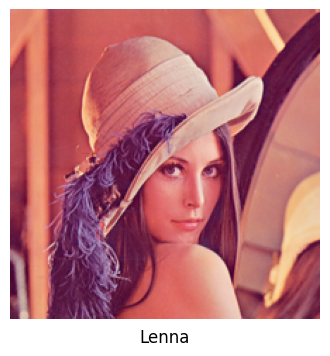

In [ ]:
plt.figure(figsize=(4,8))
plt.axis('off')
plt.title('Lenna', y=-0.1)
plt.imshow(lenna_img)

<a name="methods"></a>

#Methods 🧭

---


As mentioned above, we will express and implement several methods to convert a RGB image to Gray Scale format. Here is a list of the methods that we will visualize and compare here:

- Weighting Channels
- Max & Min Intensity
- Predefined Functions

<a name="weighting"></a>

#Weighting Channels 🏋

---

First, we will consider different weights for each channel. Notice that we normalize weights before applying them. Feel free to set different values for weights to test the methods output.

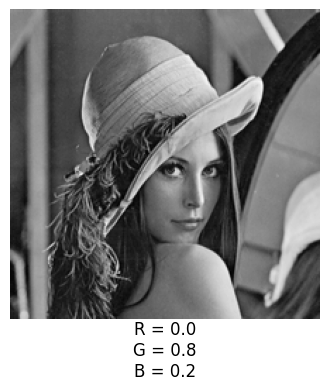

In [ ]:
# Making a new image
gr1_img = np.zeros(rgb_img.shape[:2])

# Setting weight for each channel
weights = [2, 3, 4] # R, G, B

# Getting input from user
# @title Channels' Weights
Red_weight = 0 # @param {type:"slider", min:0, max:20, step:0.5}
Green_weight = 4 # @param {type:"slider", min:0, max:20, step:0.5}
Blue_weight = 1 # @param {type:"slider", min:0, max:20, step:0.5}
weights = [Red_weight, Green_weight, Blue_weight]

# At least one weight must be non-zero
if sum(weights) == 0:
    weights = [1e-6] * 3

# Normalizing weights
weights = [w/sum(weights) for w in weights]

# Applying weights
for i in range(gr1_img.shape[0]):
    for j in range(gr1_img.shape[1]):
        gr1_img[i][j] = sum([weights[c] * rgb_img[i][j][c] for c in range(len(weights))])

# Demonstrating the result
plt.figure(figsize=(4,8))
plt.axis('off')
plt.title(f'R = {round(weights[0], 2)}\nG = {round(weights[1], 2)}\nB = {round(weights[2], 2)}', y=-0.21)
plt.imshow(gr1_img, cmap='gray')

<a name="maxmin"></a>

#Max & Min Intensity ⏫⏬

---

For the second methods, we will consider max or min of channels for each pixel. Feel free to toggle between max and min to see the results.

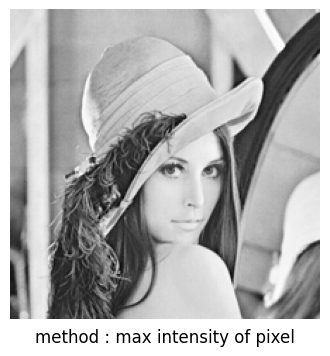

In [ ]:
# Making a new image
gr2_img = np.zeros(rgb_img.shape[:2])

# Getting input from user
# @title Max or Min?
function = "max" # @param ["max", "min"]

# Applying method
for i in range(gr1_img.shape[0]):
    for j in range(gr1_img.shape[1]):
        if function == 'max':
            gr2_img[i][j] = max(rgb_img[i][j])
        else:
            gr2_img[i][j] = min(rgb_img[i][j])

# Demonstrating the result
plt.figure(figsize=(4,8))
plt.axis('off')
plt.title(f'method : {function} intensity of pixel', y=-0.1)
plt.imshow(gr2_img, cmap='gray')

<a name="predefined"></a>

#Predefined Functions 🏭

---

Finally, we will use the predefined method inside OpenCV to convert our image to the Gray Scale format.

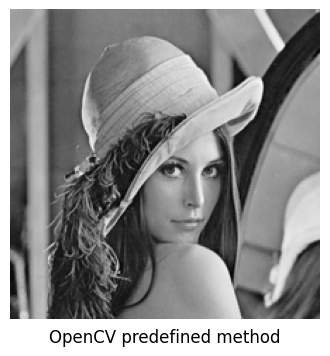

In [ ]:
# Making a new image
gr3_img = np.zeros(rgb_img.shape[:2])

# Applying the predefined function
gr3_img = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2GRAY)

# Demonstrating the result
plt.figure(figsize=(4,8))
plt.axis('off')
plt.title(f'OpenCV predefined method', y=-0.1)
plt.imshow(gr3_img, cmap='gray')

<a name="together"></a>

#Final Statistics 📊

---

Here, we exhibit output of all methods together so we compare their performance.

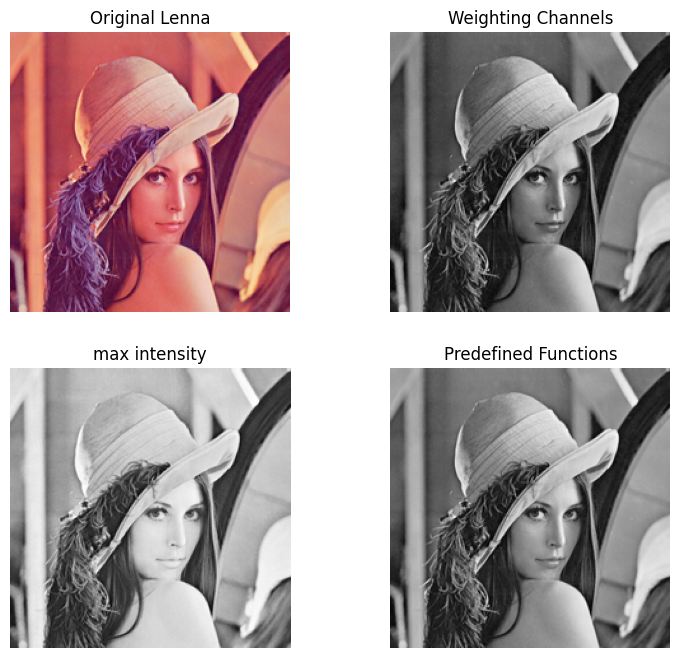

In [ ]:
# Making a figure of size 18 x 9
plt.figure(figsize=(9, 8))

# Plotting the Original Lenna
plt.subplot(2, 2, 1)
plt.title('Original Lenna')
plt.axis('off')
plt.imshow(rgb_img)

# Plotting Method #1 : Weighting Channels
plt.subplot(2, 2, 2)
plt.title('Weighting Channels')
plt.axis('off')
plt.imshow(gr1_img, cmap='gray')

# Plotting Method #2 : Max & Min Intensity
plt.subplot(2, 2, 3)
plt.title(f'{function} intensity')
plt.axis('off')
plt.imshow(gr2_img, cmap='gray')

# Plotting Method #3 : Predefined Functions
plt.subplot(2, 2, 4)
plt.title('Predefined Functions')
plt.axis('off')
plt.imshow(gr3_img, cmap='gray')

Here are our final observations:

- Assigning less weight to significant channels make our gray scaled photo darker. For example, it is obvious that red is the dominant color in Lenna's photo, and when we assing 0 as its weight we end up in darker gray scaled image. It is because the most significant channels also has highest average among all channels; therefore, by setting less weight for it, our final image whill have less intensity average too.

- Between max and min methods, it is obvious that max produces brighter images and min generates darker ones. It is simply because max function chooses the greast value of each channel for each pixel; therefore average intensity of its output is greater.

- Unfortunately, I could not find any resource to understand how OpenCV converts RGB to Gray Scale under the hood, but OpenCV final output is very similar to weighting channels and this method is the most common approach; therefore we may conclude that OpenCV also weights channels to construct our gray scale image. There are serveral methods to weight channels. For example, we can assign greater coefficient to more siginifincant channels by normalizing aggregate value of each pixel in each channels, or we can get inspiration from neuroscience and acknowledge the fact green is more recognizeable by humans; therefore we assign greater weight for green's channel.


Thanks for you attention! This notebook is available in the link below😀

https://colab.research.google.com/drive/1BznId4U1AYkl9qt1SU5dqVPLww7Gz7el?usp=sharing